In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
temperatures = np.array([300,300,300,300,300,300,300,300,300,500,500,500,500,500,750,750,750,750,750,900,900,900,900])
pressures = np.array([0,3.1,5.3,7.8,9.9,12,14,16.6,19.2,2.7,6.8,8.6,10.9,14.1,4,5.5,9,10.4,12.5,4.5,8.4,10.1,13.3])

c11 = np.array([320.2,343,358,376.4,387.8,403,418,434.4,449,332,361,371,385,402,333,344,368,373,384,330,356,364,381])
c22 = np.array([196.5,213,225,236.7,250,259.1,267.7,279.9,284,204,226,238,250,263,205,214,233,237,245,203,223,231,247])
c33 = np.array([232.3,251,263,273,282.7,293.1,301.9,310.8,326.3,240,260,271,281,290,238,248,267,272,278,236,258,263,279])

c44 = np.array([63.2,69,73,75.9,79.5,81,83.5,85.9,87.9,66.1,73.1,76.3,79,81.1,66.1,68.3,74.3,75.6,77.4,65.3,71.4,73.4,76.7])
c55 = np.array([76.6,82,85,88.2,90,91.5,92,92.9,93.1,79.4,85,87,88.6,90.6,78.9,80.9,85.8,86.3,88.3,78.2,82.6,84.7,86.7])
c66 = np.array([79.7,87.1,91.2,95.4,97.7,99.2,101.5,104.1,106.4,82,90,93,96,98,80,83,89,92,93,78,84,87,92])

c12 = np.array([71,83,92,101,109,117,124,134,137,77,93,100,109,120,78,84,99,103,105,73,91,97,100])
c13 = np.array([71,82,91,102,108,115,123,132,143,79,94,100,108,117,80,87,99,103,106,79,93,97,104])
c23 = np.array([76,87,95,104,110,119,123,134,141,82,95,103,109,119,84,88,101,104,112,84,96,99,112])

In [3]:
#%matplotlib qt
#print(plt.get_backend())

(Text(0.5, 0, 'T (K)'), Text(0.5, 0.5, 'P (GPa)'), Text(0.5, 0, 'Cijs'))

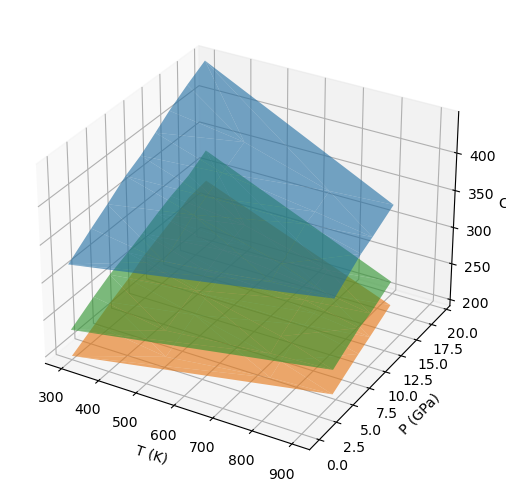

In [4]:
# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot_trisurf(temperatures, pressures, c11, alpha=0.6, linewidth=0.2, antialiased=True, label='C11')
ax.plot_trisurf(temperatures, pressures, c22, alpha=0.6, linewidth=0.2, antialiased=True, label='C22')
ax.plot_trisurf(temperatures, pressures, c33, alpha=0.6, linewidth=0.2, antialiased=True, label='C33')

ax.set_xlabel(r'T (K)'), ax.set_ylabel(r'P (GPa)'), ax.set_zlabel(r'Cijs')
#ax.legend()

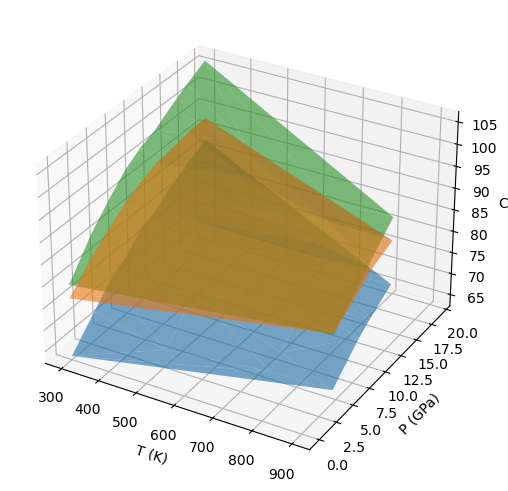

In [5]:
# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot_trisurf(temperatures, pressures, c44, alpha=0.6, linewidth=0.2, antialiased=True, label='C44')
ax.plot_trisurf(temperatures, pressures, c55, alpha=0.6, linewidth=0.2, antialiased=True, label='C55')
ax.plot_trisurf(temperatures, pressures, c66, alpha=0.6, linewidth=0.2, antialiased=True, label='C66')

_ = ax.set_xlabel(r'T (K)'), ax.set_ylabel(r'P (GPa)'), ax.set_zlabel(r'Cijs')

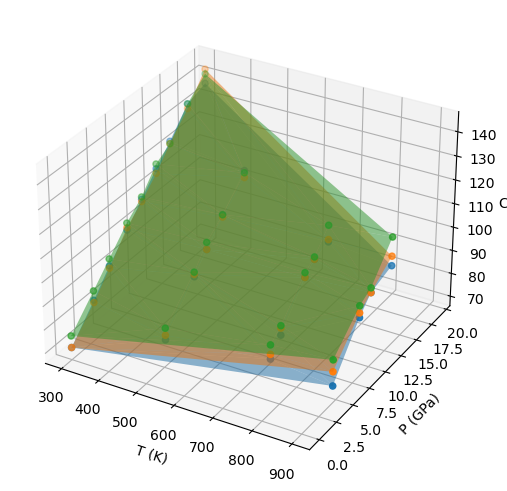

In [6]:
# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.scatter(temperatures, pressures, c12, antialiased=True, label='C12')
ax.scatter(temperatures, pressures, c13, antialiased=True, label='C13')
ax.scatter(temperatures, pressures, c23, antialiased=True, label='C23')
ax.plot_trisurf(temperatures, pressures, c12, alpha=0.5, linewidth=0.2, antialiased=True, label='C12')
ax.plot_trisurf(temperatures, pressures, c13, alpha=0.5, linewidth=0.2, antialiased=True, label='C13')
ax.plot_trisurf(temperatures, pressures, c23, alpha=0.5, linewidth=0.2, antialiased=True, label='C23')

_ = ax.set_xlabel(r'T (K)'), ax.set_ylabel(r'P (GPa)'), ax.set_zlabel(r'Cijs')

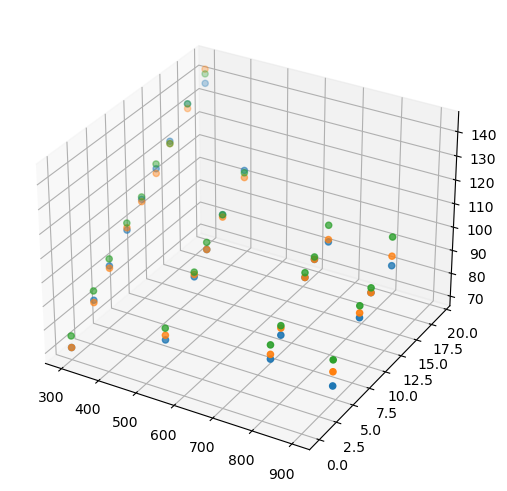

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.scatter(temperatures, pressures, c12, antialiased=True, label='C12')
ax.scatter(temperatures, pressures, c13, antialiased=True, label='C13')
ax.scatter(temperatures, pressures, c23, antialiased=True, label='C23')

polynomial 3d surface model (poly21)
$$
z = a_0 + a_1x + a_2y + a_3xy + a_4x^2 
$$

polynomial 3d surface model 2 (poly13)
$$
z = a_0 + a_1x + a_2y + a_3xy + a_4y^2 + a_5xy^2 + a_6y^3
$$

In [8]:
def model1(tupla, a0, a1, a2, a3, a4):
    x, y = tupla
    return a0 + a1*x + a2*y + a3*x*y + a4*x**2

def model2(tupla, a0, a1, a2, a3, a4, a5, a6):
    x, y = tupla
    return a0 + a1*x + a2*y + a3*x*y + a4*y**2 + a5*x*y**2 + a6*y**3

# least-squares fitting
popt, pcov = curve_fit(model1, xdata=(temperatures, pressures), ydata=c11)
popt2, pcov2 = curve_fit(model2, xdata=(temperatures, pressures), ydata=c11)

In [9]:
popt

array([ 3.31796966e+02, -3.52499587e-02,  7.23782166e+00, -1.75027244e-03,
        8.59461259e-06])

In [10]:
pcov

array([[ 1.60957810e+01, -5.39601426e-02, -4.25913103e-01,
         7.39539874e-04,  3.91138892e-05],
       [-5.39601426e-02,  2.02498347e-04,  8.15136005e-04,
        -1.60334260e-06, -1.59185582e-07],
       [-4.25913103e-01,  8.15136005e-04,  4.46288401e-02,
        -8.55054202e-05, -2.49208369e-08],
       [ 7.39539874e-04, -1.60334260e-06, -8.55054202e-05,
         2.00821185e-07, -1.80235632e-10],
       [ 3.91138892e-05, -1.59185582e-07, -2.49208369e-08,
        -1.80235632e-10,  1.38487812e-10]])

In [11]:
# make data
ts = np.linspace(300, 900)
ps = np.linspace(0, 20)
Ts, Ps = np.meshgrid(ts, ps)
Zs = model1((Ts, Ps), popt[0], popt[1], popt[2], popt[3], popt[4])

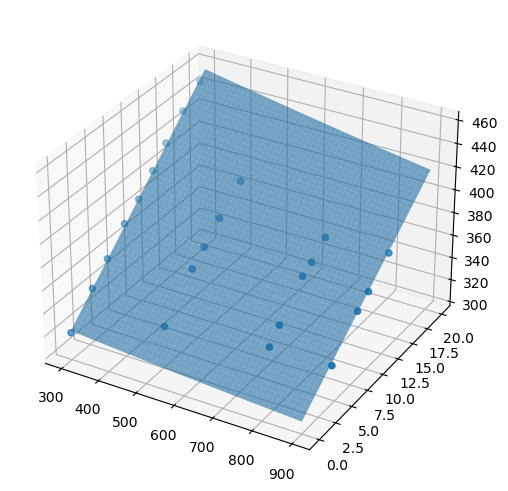

In [12]:
# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.scatter(temperatures, pressures, c11, antialiased=True, label='C11')
ax.plot_surface(Ts, Ps, Zs, alpha=0.6, rstride=1, cstride=1)

In [13]:
sigma2 = 2 * np.sqrt(np.diag(pcov))

print("Polynomial model poly13")
print("Coefficients, 2σ:")
for index, item in enumerate(popt):
        print(f"a{index} = {item:.4f}, ± {sigma2[index]:.4f}")

Polynomial model poly13
Coefficients, 2σ:
a0 = 331.7970, ± 8.0239
a1 = -0.0352, ± 0.0285
a2 = 7.2378, ± 0.4225
a3 = -0.0018, ± 0.0009
a4 = 0.0000, ± 0.0000


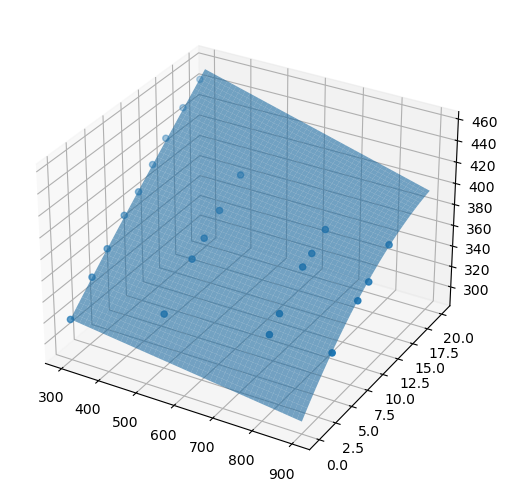

In [14]:
Zs = model2((Ts, Ps), popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5], popt2[6])

# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.scatter(temperatures, pressures, c11, antialiased=True, label='C11')
ax.plot_surface(Ts, Ps, Zs, alpha=0.6, rstride=1, cstride=1)

In [15]:
sigma2 = 2 * np.sqrt(np.diag(pcov2))

print("Polynomial model poly13")
print("Coefficients, 2σ:")
for index, item in enumerate(popt2):
        print(f"a{index} = {item:.4f}, ± {sigma2[index]:.4f}")

Polynomial model poly13
Coefficients, 2σ:
a0 = 334.1440, ± 6.1681
a1 = -0.0456, ± 0.0157
a2 = 6.2656, ± 1.8802
a3 = 0.0035, ± 0.0038
a4 = 0.0421, ± 0.1873
a5 = -0.0003, ± 0.0002
a6 = 0.0010, ± 0.0056
